___________________
# Phase 2 - Milestone 1
    Pratama Waskito Prihandana
    FTDS - Batch 003

_____
# I. Introduction


A company wants to minimize the risk of a customer to stop using the product they offer. The objective is to predict customer churn rate from the given dataset using Artificial Neural Network.

_______
# II. Library

In [1]:
!pip install feature_engine
!pip install phik
!pip install scikit-learn
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 6.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 12.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from scipy import stats

from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier

# correlation finder
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

# hyperparameter tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# preprocessing data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# model evaluation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,precision_recall_curve,auc,f1_score

# sequential model to initialise ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from keras.optimizers import Adadelta
from keras.optimizers import Adagrad

_______________
# III. Load data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving churn.csv to churn.csv


In [4]:
df = pd.read_csv('churn.csv')
df_backup = df

In [5]:
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [6]:
df.tail()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [7]:
df.shape

(37010, 22)

In [8]:
df.dtypes

user_id                          object
age                               int64
gender                           object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days        float64
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [9]:
numlist = ['age','days_since_last_login', 
           'avg_time_spent',
           'avg_transaction_value',
           'avg_frequency_login_days',
           'points_in_wallet']

catlist = ['user_id',
            'gender',
            'region_category',
            'membership_category',
            'joining_date',
            'joined_through_referral',
            'preferred_offer_types',
            'medium_of_operation',
            'internet_option',
            'last_visit_time',
            'used_special_discount',
            'offer_application_preference',
            'past_complaint',
            'complaint_status',
            'feedback']

In [10]:
# numerical feature describe

df[numlist].describe().T

,count,mean,std,min,25%,50%,75%,max
age,37010.0,37.120697,15.866834,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,37010.0,-41.943502,228.875324,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,37010.0,279.201356,330.017336,0.00,60.1225,161.770,356.5250,3235.578521
avg_transaction_value,37010.0,29272.430216,19445.963492,800.46,14177.8350,27554.485,40858.6725,99914.050000
avg_frequency_login_days,37010.0,14.659540,9.478756,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,37010.0,623.590885,270.218956,0.00,574.2200,680.400,756.9900,2069.069761


In [11]:
# Categorical feature describe

df[catlist].describe().T

,count,unique,top,freq
user_id,37010,36992,b749631fc10ff0da,2
gender,36951,2,F,18497
region_category,31579,3,Town,14135
membership_category,37010,6,Basic Membership,7727
joining_date,37010,1096,2015-06-02,55
joined_through_referral,31568,2,No,15846
preferred_offer_types,36722,3,Gift Vouchers/Coupons,12357
medium_of_operation,31615,3,Desktop,13917
internet_option,37010,3,Wi-Fi,12417
last_visit_time,37010,30101,07:56:41,6


In [12]:
# convert joining date into month-year

df['joining_date'] = pd.to_datetime(df['joining_date'])
df['joining_date'] = df['joining_date'].dt.to_period("M")

In [13]:
# unique value in categorical columns

for i in df[catlist]:
    print(i)
    print()
    print(df[catlist][i].value_counts())
    print('■' * 60)

user_id

b749631fc10ff0da    2
9c8c2db425854d5e    2
9186d6f284e4ac5b    2
a121fe1247bf3d61    2
9f97903015fd0580    2
                   ..
a11563b8312bd92e    1
835a897bb342ae27    1
887c3b0d137541b8    1
9b6a1597dd513b25    1
93b5d0330d24fa15    1
Name: user_id, Length: 36992, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
gender

F    18497
M    18454
Name: gender, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
region_category

Town       14135
City       12744
Village     4700
Name: region_category, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
membership_category

Basic Membership       7727
No Membership          7693
Gold Membership        6799
Silver Membership      5991
Premium Membership     4458
Platinum Membership    4342
Name: membership_category, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
joining_date

2015-07    1103
2017-12    1093
2017-10    1086
2017-08   

_______
# IV. Data Cleaning

### Handling missing value

In [14]:
# Check missing value

def null(df):
    mv = pd.DataFrame(df.isnull().sum()).rename(columns={0:'missing_values'})
    return mv[mv.missing_values > 0].sort_values('missing_values', ascending=False)
null(df)


,missing_values
joined_through_referral,5442
region_category,5431
medium_of_operation,5395
preferred_offer_types,288
gender,59


In [15]:
# percentage missing value

(df[['joined_through_referral','region_category','medium_of_operation','preferred_offer_types','gender']].isnull().sum() / df.shape[0]).round(3) * 100

joined_through_referral    14.7
region_category            14.7
medium_of_operation        14.6
preferred_offer_types       0.8
gender                      0.2
dtype: float64

we can drop missing value below 1%



In [16]:
df = df.dropna(subset=['gender', 'preferred_offer_types'])

The missing value percentage of that columns is almost 15% each, this may impact to data distribution if we drop them all. We will impute the missing value with mode of its distribution since they are categorical data.

In [17]:
# Impute the missing value of percentage above 10% with mode

df['joined_through_referral'].fillna(df['joined_through_referral'].mode()[0], inplace=True)
df['region_category'].fillna(df['region_category'].mode()[0], inplace=True)
df['medium_of_operation'].fillna(df['medium_of_operation'].mode()[0], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
# percentage missing value

(df[['joined_through_referral','region_category','medium_of_operation','preferred_offer_types','gender']].isnull().sum() / df.shape[0]).round(2) * 100

joined_through_referral    0.0
region_category            0.0
medium_of_operation        0.0
preferred_offer_types      0.0
gender                     0.0
dtype: float64

______
### Handling Oulier

 age : 0.00%
 days_since_last_login : 5.41%
 avg_time_spent : 2.15%
 avg_transaction_value : 1.93%
 avg_frequency_login_days : 0.84%
 points_in_wallet : 0.22%


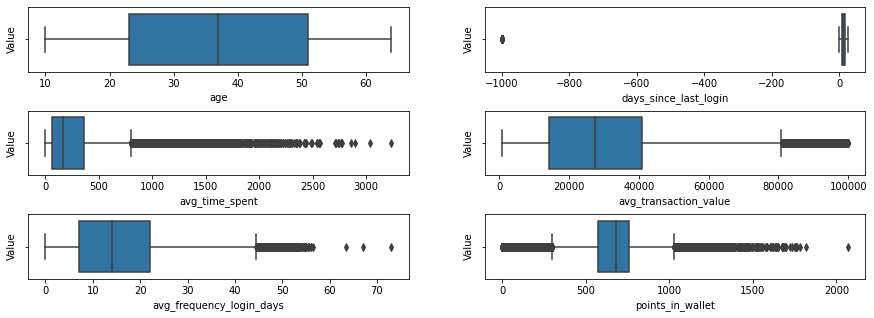

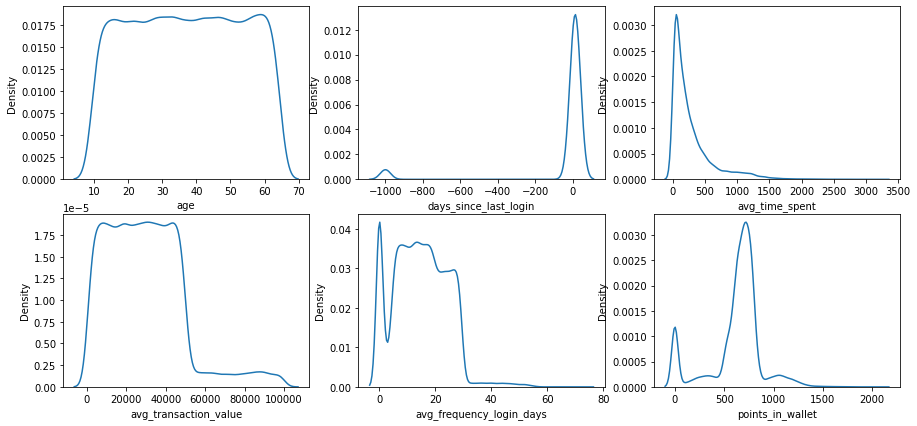

In [19]:
# percentage outlier
for col in df[numlist].columns:
    
    # Identify the outliers using Z-score method
    z_scores = stats.zscore(df[numlist][col])
    outliers_index = np.where(np.abs(z_scores) > 3)
    outliers = df[numlist].iloc[outliers_index]
    
    # calculate the percentage of outliers
    outliers_percentage = len(outliers) / len(df[numlist][col]) * 100
    print(" {} : {:.2f}%".format(col, outliers_percentage))
    
# Boxplot outlier
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,5), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(df[numlist].columns):
    # Create a boxplot of the column
    sns.boxplot(x=df[numlist][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")

# check data distribution
plt.figure(figsize=(15,7))
for i, col in enumerate(df[numlist].columns):
    if df[numlist][col].dtype != 'object':
        ax = plt.subplot(2, 3, i+1)
        sns.kdeplot(df[numlist][col], ax=ax)
        plt.xlabel(col)
plt.show()

Cleaning outliers is the process of identifying and removing extreme or unusual values in a dataset that are not representative of the majority of the data. Outliers can occur due to measurement errors, data entry errors, or simply because they are truly exceptional cases. Removing outliers can improve the accuracy and reliability of statistical analysis and modeling by reducing the influence of these exceptional cases. There are various methods for identifying and cleaning outliers, including using statistical measures such as standard deviation, quartiles, and box plots, and using machine learning techniques such as clustering and anomaly detection.

<ipython-input-20-291877a0123a>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outl_index = df[numlist][((df[numlist] < (Q1 - 1.5 * IQR)) |(df[numlist] > (Q3 + 1.5 * IQR))).any(axis=1)].index.tolist()


 age : 0.00%
 days_since_last_login : 0.00%
 avg_time_spent : 0.99%
 avg_transaction_value : 0.70%
 avg_frequency_login_days : 0.27%
 points_in_wallet : 1.62%


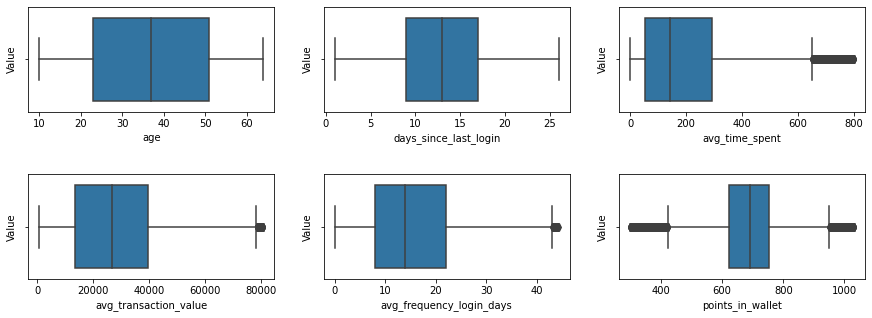

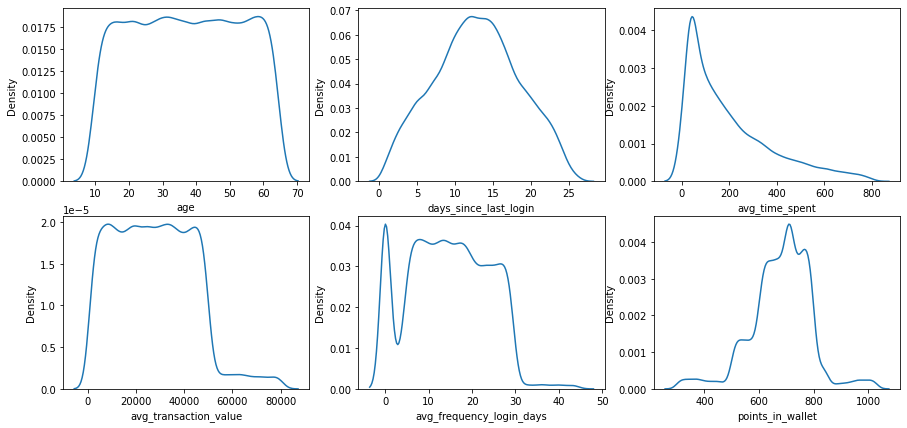

In [20]:
# outlier cleaning

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# outliers into index array
outl_index = df[numlist][((df[numlist] < (Q1 - 1.5 * IQR)) |(df[numlist] > (Q3 + 1.5 * IQR))).any(axis=1)].index.tolist()

# drop outlier from dataset
df2 = df.drop(index=outl_index, axis=1)

# percentage outlier
for col in df2[numlist].columns:
    # Identify the outliers using Z-score method
    z_scores = stats.zscore(df2[numlist][col])
    outliers_index = np.where(np.abs(z_scores) > 3)
    outliers = df2[numlist].iloc[outliers_index]
    # calculate the percentage of outliers
    outliers_percentage = len(outliers) / len(df2[numlist][col]) * 100
    print(" {} : {:.2f}%".format(col, outliers_percentage))
    
# Boxplot outlier
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(df[numlist].columns):
    # Create a boxplot of the column
    sns.boxplot(x=df2[numlist][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")

# check data distribution
plt.figure(figsize=(15,7))
for i, col in enumerate(df2[numlist].columns):
    if df2[numlist][col].dtype != 'object':
        ax = plt.subplot(2, 3, i+1)
        sns.kdeplot(df2[numlist][col], ax=ax)
        plt.xlabel(col)
plt.show()

Cleaning outliers twice can have both positive and negative effects on the data. If done correctly, cleaning outliers twice can improve the accuracy and reliability of statistical analysis by removing extreme values that are not representative of the majority of the data. However, if done poorly, cleaning outliers twice can lead to over-cleaning or under-cleaning, resulting in the loss of important information or incorrect conclusions. Therefore, it is important to be careful and thoughtful when cleaning outliers to ensure that the final data accurately represents the underlying information.

_____
### Remove duplicate

In [21]:
# check duplicate
df[df.duplicated()].shape

(18, 22)

In [22]:
# drop dulicate
df = df.drop_duplicates()
df.reset_index().shape

(36646, 23)

In [23]:
# drop unnecessary column
df = df.drop(['user_id', 'last_visit_time','joining_date'], axis=1)

_____
# V. Exlporatory Data Analysis

In [24]:
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,29,F,Town,No Membership,Yes,Without Offers,Desktop,Wi-Fi,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,50,M,Town,Basic Membership,Yes,Without Offers,Desktop,Fiber_Optic,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,26,F,City,Silver Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,63,F,Village,No Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,64,M,Town,Silver Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


1    19827
0    16819
Name: churn_risk_score, dtype: int64


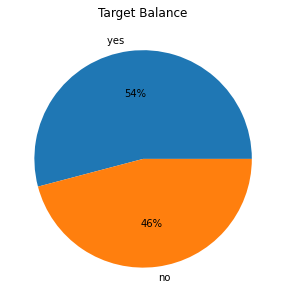

In [25]:
# Check the target distribution

fig, ax = plt.subplots(figsize=(5,5))
ax.pie(df['churn_risk_score'].value_counts(),labels=['yes ','no'],autopct='%0.0f%%')
plt.title("Target Balance")

print(df['churn_risk_score'].value_counts())

The balance data target in a deep learning model refers to ensuring that the distribution of the target classes in the training data is balanced and not skewed towards one particular class. This is important because a skewed distribution of the target classes can result in a deep learning model that is biased towards the majority class and performs poorly on the minority class.

In [26]:
numlist = ['age','days_since_last_login', 
           'avg_time_spent',
           'avg_transaction_value',
           'avg_frequency_login_days',
           'points_in_wallet']

catlist = [
            'gender',
            'region_category',
            'membership_category',
            'joined_through_referral',
            'preferred_offer_types',
            'medium_of_operation',
            'internet_option',
            'used_special_discount',
            'offer_application_preference',
            'past_complaint',
            'complaint_status',
            'feedback']

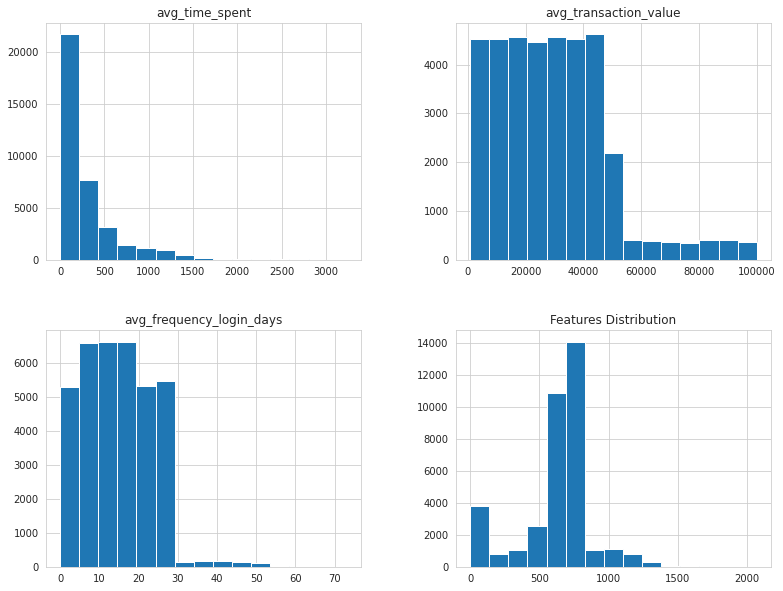

In [144]:
# numerical data distribution

df[numlist].hist(figsize=(13,10),bins = 15)
plt.title("Features Distribution")
plt.show()

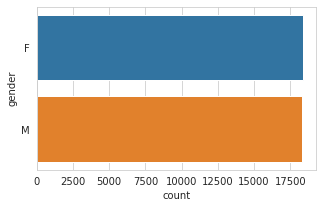

In [28]:
plt.figure(figsize=(5,3))
sns.set_style("whitegrid")
sns.countplot(y='gender', data=df)

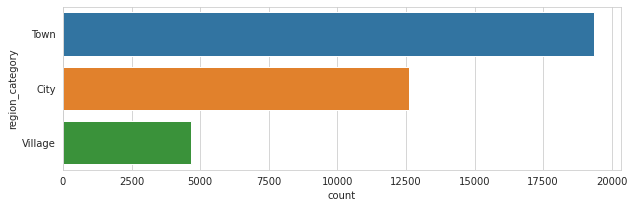

In [29]:
plt.figure(figsize=(10,3))
sns.set_style("whitegrid")
sns.countplot(y='region_category', data=df)

The customer from the town is dominant then customer in city, and village. It indicates that the company location may be closer to the town.

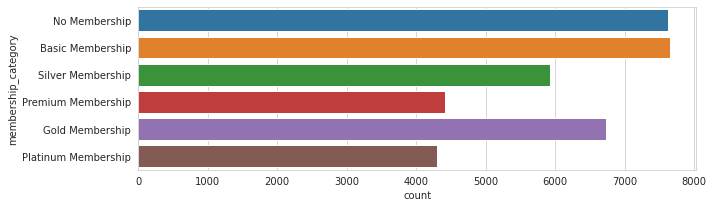

In [30]:
plt.figure(figsize=(10,3))
sns.set_style("whitegrid")
sns.countplot(y='membership_category', data=df)

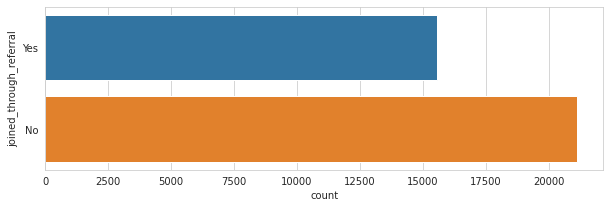

In [31]:
plt.figure(figsize=(10,3))
sns.set_style("whitegrid")
sns.countplot(y='joined_through_referral', data=df)

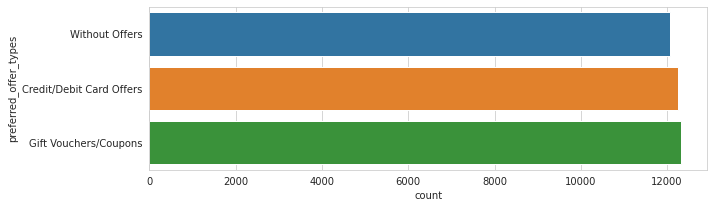

In [32]:
plt.figure(figsize=(10,3))
sns.set_style("whitegrid")
sns.countplot(y='preferred_offer_types', data=df)

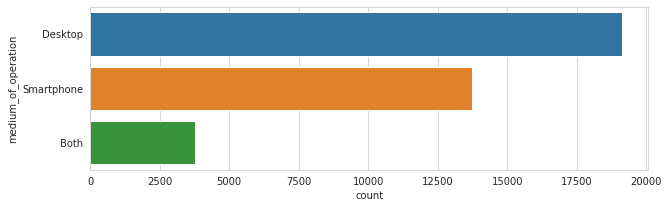

In [33]:
plt.figure(figsize=(10,3))
sns.set_style("whitegrid")
sns.countplot(y='medium_of_operation', data=df)

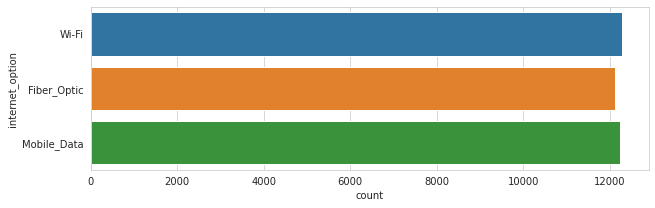

In [34]:
plt.figure(figsize=(10,3))
sns.set_style("whitegrid")
sns.countplot(y='internet_option', data=df)

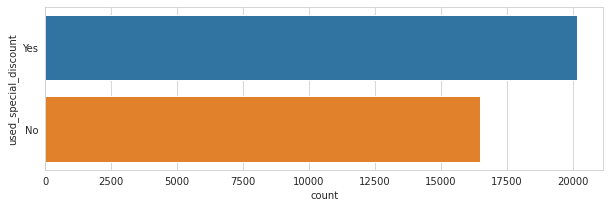

In [35]:
plt.figure(figsize=(10,3))
sns.set_style("whitegrid")
sns.countplot(y='used_special_discount', data=df)

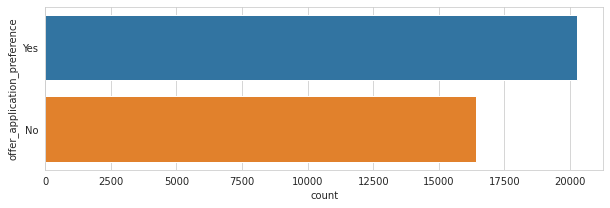

In [36]:
plt.figure(figsize=(10,3))
sns.set_style("whitegrid")
sns.countplot(y='offer_application_preference', data=df)

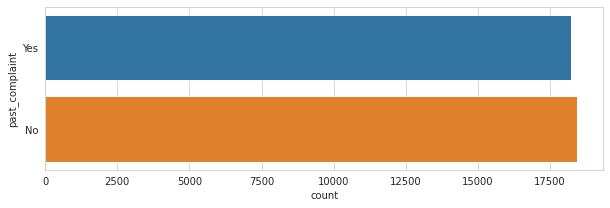

In [37]:
plt.figure(figsize=(10,3))
sns.set_style("whitegrid")
sns.countplot(y='past_complaint', data=df)

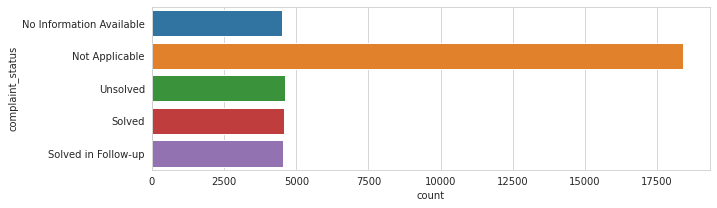

In [38]:
plt.figure(figsize=(10,3))
sns.set_style("whitegrid")
sns.countplot(y='complaint_status', data=df)

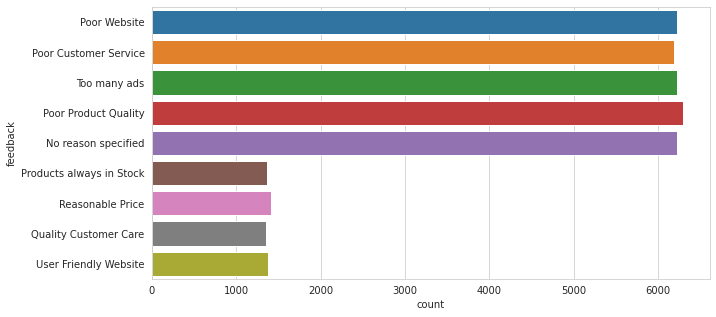

In [39]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.countplot(y='feedback', data=df)

```Statement :```

The negative feedback is dominant than the positive one. If we compare to customer membership, that company has loyal customer if we see from their membership type. This can be a bad sign to this company due to dominant negative feedback from the loyal customers. If there is no problem solving, this feature may have strong correlation to the churn risk.

Negative feedback from a loyal customer regarding churn risk can be an early warning sign of potential customer churn. Churn is the process of a customer discontinuing use of a company's products or services. When a loyal customer provides negative feedback, it's important to take it seriously and consider it as a potential indicator of churn risk. This can help companies to proactively address the customer's concerns and improve the customer experience, reducing the likelihood of the customer churning. It's also important to track and analyze customer feedback over time to identify trends and patterns that may indicate increased churn risk. Addressing these issues promptly can help to retain valuable customers and prevent the negative impact of customer churn on the company's bottom line.

______
# VI. Data Preprocessing


In [40]:
# correlation value with PhiK according to Churn Risk Score
phik_value = df.phik_matrix().churn_risk_score
phik_value.sort_values(ascending=False)

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


churn_risk_score                1.000000
membership_category             0.942304
feedback                        0.455936
points_in_wallet                0.449527
avg_transaction_value           0.408894
avg_frequency_login_days        0.165866
joined_through_referral         0.043545
offer_application_preference    0.029310
preferred_offer_types           0.025768
avg_time_spent                  0.025319
used_special_discount           0.013849
region_category                 0.012242
past_complaint                  0.011981
medium_of_operation             0.010742
complaint_status                0.003034
internet_option                 0.002008
gender                          0.000000
age                             0.000000
days_since_last_login                NaN
Name: churn_risk_score, dtype: float64

```Statement :```  

A correlation value of 0 indicates that there is no linear relationship between two variables. In other words, a change in one variable does not result in a corresponding change in the other variable. A correlation value of 0 suggests that the variables are uncorrelated, meaning that they are independent of each other.

If the correlation value of two variables, represented by Phi-k, is 0, it does not necessarily mean that the variables are completely unrelated. It only means that there is no linear relationship between them. There may still be other types of relationships, such as non-linear relationships, between the variables.

A correlation value of 0 suggests that there is no linear relationship between two variables, but it does not rule out the possibility of other types of relationships between the variables.

For further model processing, we can remove the features with correlation value 0 according to churn risk.

In [41]:
# drop the column with no correlation to churn risk
df = df.drop(['gender', 'age', 'days_since_last_login'], axis=1)

In [42]:
numlist = ['avg_time_spent',
           'avg_transaction_value',
           'avg_frequency_login_days',
           'points_in_wallet']

catlist = [ 'region_category',
            'membership_category',
            'joined_through_referral',
            'preferred_offer_types',
            'medium_of_operation',
            'internet_option',
            'used_special_discount',
            'offer_application_preference',
            'past_complaint',
            'complaint_status',
            'feedback']

In [43]:
# scaling numerical data
scaler = MinMaxScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df[numlist]))

# encoding categorical data
encode = OrdinalEncoder()
df_cat_encoded = pd.DataFrame(encode.fit_transform(df[catlist]))

# concatenate numerical and categorical
df2 = pd.DataFrame(np.concatenate([df_num_scaled, df_cat_encoded, df[['churn_risk_score']]], axis=1), columns=df[numlist].columns.tolist()+df[catlist].columns.tolist()+['churn_risk']).round(2)



In [44]:
df2.head()

,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk
0,0.37,0.38,0.14,0.30,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,3.0,1.0
1,0.10,0.07,0.23,0.28,1.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,0.07,0.37,0.07,0.37,0.0,5.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7.0,0.0
3,0.02,0.15,0.15,0.29,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,7.0,1.0
4,0.05,0.08,0.00,0.35,1.0,5.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0


In [45]:
df2.shape

(36646, 16)

In [46]:
# split into target (y) and features (x)
x = df2.drop('churn_risk', axis=1)
y = df2['churn_risk']

In [47]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = np.random.randint(1,100))

In [48]:
# Splitting the dataset into the Training set and Validation set
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = np.random.randint(1,100))

In [49]:
print('x_train :', x_train.shape)
print('x_test :', x_test.shape)

x_train : (25652, 15)
x_test : (10994, 15)


_______
# VII. Model Implementation

### Sequential type

In deep learning, a sequential model is a type of artificial neural network (ANN) architecture that is built in a linear, sequential way. The sequential model is a linear stack of layers, where each layer is connected to the previous one, and the output of one layer is used as the input to the next layer. The layers can be of different types, including dense, convolutional, recurrent, or pooling layers. The sequential model is a flexible architecture that can be used for a wide range of tasks, including image classification, text generation, and time series prediction. The sequential model is a popular choice for deep learning because it is simple to implement and easy to understand, making it a good starting point for many applications.

### Model 1 - Sequential

In [118]:
model1 = tf.keras.models.Sequential()
# Adding the input layer and the first hidden layer
model1.add(Dense(units = 15, 
                 input_shape = (x_train.shape[1],),
                 kernel_initializer = 'uniform', 
                 activation = 'relu', 
                 input_dim = 15))

# Adding the second hidden layer
model1.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN 
model1.compile(optimizer = 'adam', 
               loss = 'binary_crossentropy', 
               metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = model1.fit(x_train, y_train, batch_size = 32, epochs = 100,verbose = 0, validation_split=0.2)

In [119]:
# Predicting the Test set results
y_pred1 = model1.predict(x_test)
y_pred1 = (y_pred1 > 0.5)

344/344 [==============================] - 0s 1ms/step


In [120]:
score1, acc1 = model1.evaluate(x_test, y_test, batch_size=32)
print('Test score:', score1)
print('Test accuracy:', acc1)

344/344 [==============================] - 1s 1ms/step - loss: 0.2534 - accuracy: 0.8934
Test score: 0.2533988952636719
Test accuracy: 0.8933963775634766


              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      5079
         1.0       0.93      0.87      0.90      5915

    accuracy                           0.89     10994
   macro avg       0.89      0.90      0.89     10994
weighted avg       0.90      0.89      0.89     10994



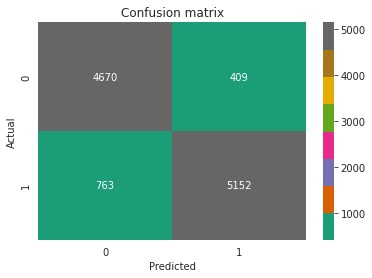

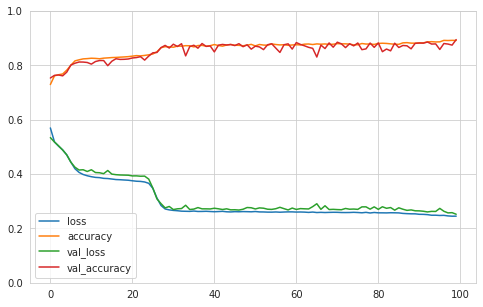

In [121]:
# classification_report
print(classification_report(y_test,y_pred1))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Dark2" ,fmt='g')
plt.title('Confusion matrix', y=2.2)
plt.xlabel('Predicted')
plt.ylabel('Actual')

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


True     5561
False    5433
dtype: int64

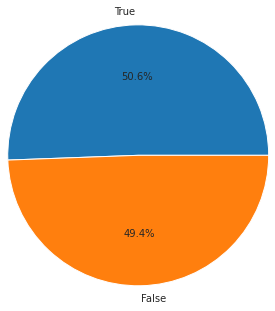

In [189]:
# Churn Prediction Distribution

pd.DataFrame(y_pred1).value_counts()
plt.figure(figsize=(3,3))
plt.pie(pd.DataFrame(y_pred1).value_counts(),labels=['True','False'],autopct='%0.1f%%',radius=2)
pd.DataFrame(y_pred1).value_counts()

### Model 2 - Sequential

In [54]:
model2 = keras.models.Sequential([
    
    # Input layer
    keras.layers.Dense(units = 15,
                       input_shape = (x_train.shape[1],),
                       kernel_initializer='random_uniform',
                       kernel_regularizer='l2'),
    keras.layers.BatchNormalization(),

    # hidden layer 1
    keras.layers.Dense(units = 20, activation ='relu'),
    keras.layers.BatchNormalization(),

    # hidden layer 2
    keras.layers.Dense(units = 10, activation ='relu'),
    keras.layers.BatchNormalization(),

    # hidden layer 3
    keras.layers.Dense(units = 5, activation ='relu'),
    keras.layers.BatchNormalization(),

    # hidden layer 4
    keras.layers.Dense(units = 2, activation ='relu'),
    keras.layers.BatchNormalization(),

    # output layer
    keras.layers.Dense(1, activation="sigmoid")
])

# Compiling the ANN 
model2.compile(optimizer = 'adam', 
               loss = 'binary_crossentropy', 
               metrics = ['accuracy'])

history2 = model2.fit(x_train, 
                      y_train, 
                      epochs=20,
                      validation_data = (x_valid, y_valid), 
                      verbose=0)

# Predicting the Test set results
y_pred2 = model2.predict(x_test)
y_pred2 = (y_pred2 > 0.5)

344/344 [==============================] - 1s 2ms/step


In [55]:
score2, acc2 = model2.evaluate(x_test, y_test, batch_size=32)
print('Test score:', score2)
print('Test accuracy:', acc2)

344/344 [==============================] - 1s 2ms/step - loss: 0.2881 - accuracy: 0.8504
Test score: 0.2880912125110626
Test accuracy: 0.8503729104995728


              precision    recall  f1-score   support

         0.0       0.77      0.96      0.86      5079
         1.0       0.95      0.76      0.85      5915

    accuracy                           0.85     10994
   macro avg       0.86      0.86      0.85     10994
weighted avg       0.87      0.85      0.85     10994



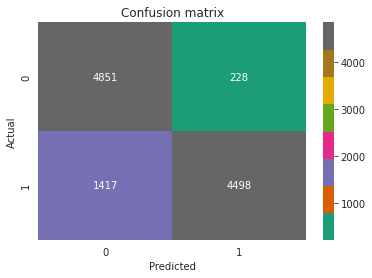

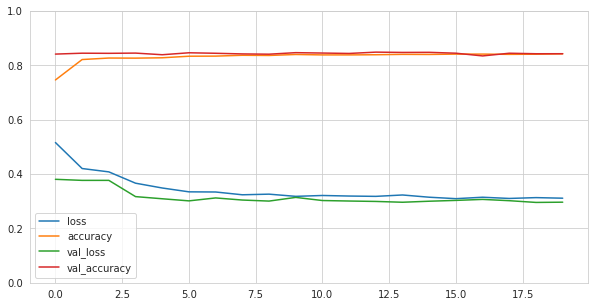

In [56]:
# classification_report
print(classification_report(y_test,y_pred2))

# Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="Dark2" ,fmt='g')
plt.title('Confusion matrix', y=2.2)
plt.xlabel('Predicted')
plt.ylabel('Actual')

pd.DataFrame(history2.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [57]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                240       
                                                                 
 batch_normalization (BatchN  (None, 15)               60        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 20)                320       
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 batch_normalization_2 (Batc  (None, 10)              

False    6268
True     4726
dtype: int64

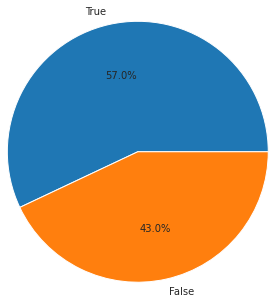

In [191]:
# Churn Prediction Distribution

pd.DataFrame(y_pred2).value_counts()
plt.figure(figsize=(3,3))
plt.pie(pd.DataFrame(y_pred2).value_counts(),labels=['True','False'],autopct='%0.1f%%',radius=2)
pd.DataFrame(y_pred2).value_counts()

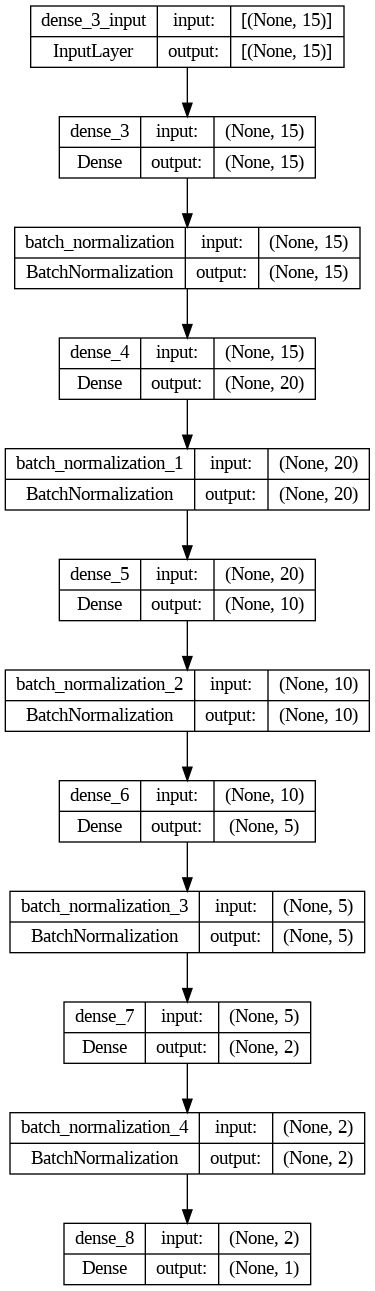

In [58]:
keras.utils.plot_model(model2, show_shapes=True)  

```Statement :```

In those two sequential type models, a test score of 0.2 suggests that the model has a low level of error, which is generally a good thing. However, it's important to consider the context and the type of problem being solved, as different problems may have different acceptable levels of error.

The test accuracy of 0.89 indicates that the model is able to make correct predictions 89% of the time. This is a relatively high level of accuracy, but again, it's important to consider the context and the type of problem being solved. In some applications, a test accuracy of 89% may be considered good, while in others, it may be considered inadequate.

Overall, the test score and accuracy of 0.2 and 0.89 respectively in an ANN model with the Adam optimizer indicate a relatively good level of performance, but it's important to keep the context and the type of problem being solved in mind when interpreting these metrics.

### Model 3 - Functional

In deep learning, a functional model is a type of artificial neural network (ANN) that is built using the functional API of a deep learning framework, such as TensorFlow or Keras. It allows you to create more complex and flexible network architectures compared to a simpler sequential model.

Think of it like building with Lego blocks. In the sequential model, you stack blocks one on top of the other, in a linear fashion. In the functional model, you can connect blocks in different ways, forming more intricate structures. This allows for more advanced and specialized neural networks.

In [59]:
#Functional

# imput layer
input_lyr = tf.keras.layers.Input(shape=(x_train.shape[1],))

# hidden layer 1
layers_a = tf.keras.layers.Dense(units = 30, activation='relu',kernel_initializer='random_uniform',kernel_regularizer='l2')(input_lyr)
layers_b = tf.keras.layers.BatchNormalization()(layers_a)

# hidden layer 2
layers_c = tf.keras.layers.Dense(units = 20, kernel_initializer='random_uniform',activation='relu')(layers_b)
layers_d = tf.keras.layers.BatchNormalization()(layers_c)

# hidden layer 3
layers_c = tf.keras.layers.Dense(units = 10, kernel_initializer='random_uniform',activation='relu')(layers_b)
layers_d = tf.keras.layers.BatchNormalization()(layers_c)

# output layer
output_lyr = tf.keras.layers.Dense(units = 1, kernel_initializer='random_uniform',activation='sigmoid')(layers_d)

# assign model
model4 = tf.keras.models.Model(inputs=input_lyr, outputs=output_lyr)

In [60]:
model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense_9 (Dense)             (None, 30)                480       
                                                                 
 batch_normalization_5 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 10)                310       
                                                                 
 batch_normalization_7 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 1)                 11    

In [61]:
model4.compile(
    loss='binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(clipvalue=0.5,learning_rate=0.01),
    metrics='accuracy')

In [62]:
early_stop = EarlyStopping(monitor='val_loss', patience=20)

history4 = model4.fit(x_train, 
                      y_train, 
                      epochs=50, 
                      batch_size=32,
                      callbacks = [early_stop], 
                      validation_data=(x_valid, y_valid))

Epoch 1/50
802/802 [==============================] - 4s 4ms/step - loss: 0.4457 - accuracy: 0.7942 - val_loss: 0.5714 - val_accuracy: 0.7926
Epoch 2/50
802/802 [==============================] - 3s 3ms/step - loss: 0.3570 - accuracy: 0.8346 - val_loss: 0.3263 - val_accuracy: 0.8411
Epoch 3/50
802/802 [==============================] - 2s 3ms/step - loss: 0.3502 - accuracy: 0.8381 - val_loss: 1.3471 - val_accuracy: 0.6353
Epoch 4/50
802/802 [==============================] - 3s 3ms/step - loss: 0.3573 - accuracy: 0.8340 - val_loss: 0.3666 - val_accuracy: 0.8371
Epoch 5/50
802/802 [==============================] - 3s 3ms/step - loss: 0.3558 - accuracy: 0.8329 - val_loss: 0.3959 - val_accuracy: 0.7967
Epoch 6/50
802/802 [==============================] - 2s 3ms/step - loss: 0.3416 - accuracy: 0.8381 - val_loss: 0.4783 - val_accuracy: 0.7789
Epoch 7/50
802/802 [==============================] - 2s 3ms/step - loss: 0.3467 - accuracy: 0.8348 - val_loss: 0.3957 - val_accuracy: 0.8394
Epoch 

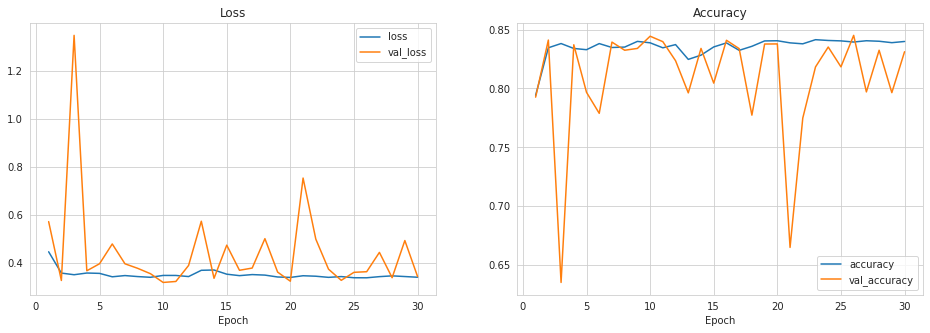

In [64]:
epoch=30

fig, ax = plt.subplots(ncols=2,figsize=(16,5))

ax[0].plot(range(1,epoch+1),history4.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history4.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history4.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history4.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

In [146]:
# Predicting the Test set results
y_pred3 = model4.predict(x_test)
y_pred3 = (y_pred3 > 0.5)

344/344 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

         0.0       0.92      0.70      0.79      5079
         1.0       0.78      0.94      0.86      5915

    accuracy                           0.83     10994
   macro avg       0.85      0.82      0.82     10994
weighted avg       0.84      0.83      0.83     10994

344/344 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 0.8295
Test score: 0.33849769830703735
Test accuracy: 0.82954341173172


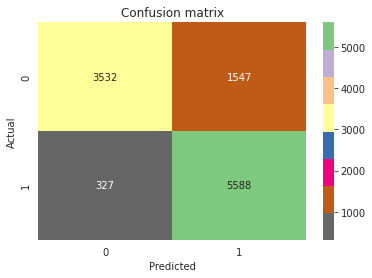

In [147]:
# classification_report
print(classification_report(y_test,y_pred3))

# Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred3)
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="Accent_r" ,fmt='g')
plt.title('Confusion matrix', y=2.2)
plt.xlabel('Predicted')
plt.ylabel('Actual')

score3, acc3 = model4.evaluate(x_test, y_test, batch_size=32)
print('Test score:', score3)
print('Test accuracy:', acc3)

True     7135
False    3859
dtype: int64

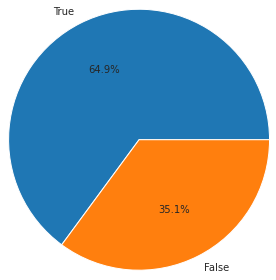

In [192]:
# Churn Prediction Distribution

pd.DataFrame(y_pred3).value_counts()
plt.figure(figsize=(3,3))
plt.pie(pd.DataFrame(y_pred3).value_counts(),labels=['True','False'],autopct='%0.1f%%',radius=2)
pd.DataFrame(y_pred3).value_counts()

```Statement :```

An unstable validation accuracy but a good accuracy in a deep learning model is a common scenario and can indicate several possible issues.  

Validation accuracy is a metric that measures the performance of the model on a validation set, which is a portion of the data set that is set aside for testing the model during training. Unstable validation accuracy can indicate that the model is overfitting, which means that it is fitting too closely to the training data and not generalizing well to unseen data. This can result in poor performance on the validation set.  

If the accuracy on the validation set is good, it suggests that the model is generalizing well to unseen data, despite the instability in the validation accuracy. This may indicate that the model is still performing well, but further investigation is needed to understand the cause of the instability.

### Model 4 - Functional

In [138]:
#Functional

# imput layer
input_lyr = tf.keras.layers.Input(shape = (x_train.shape[1]))
layers_z = tf.keras.layers.BatchNormalization()(input_lyr)

# hidden layer 1
layers_a = tf.keras.layers.Dense(units = 20, activation='relu',kernel_initializer='random_uniform')(layers_z)
layers_b = tf.keras.layers.BatchNormalization()(layers_a)

# hidden layer 2
layers_c = tf.keras.layers.Dense(units = 10, activation='relu',kernel_initializer='lecun_uniform')(layers_b)
layers_d = tf.keras.layers.BatchNormalization()(layers_c)

# hidden layer 3
layers_e = tf.keras.layers.Dense(units = 10, activation='relu',kernel_initializer='lecun_normal')(layers_d)
layers_f = tf.keras.layers.BatchNormalization()(layers_e)

# hidden layer 4
layers_g = tf.keras.layers.Dense(units = 2, activation='relu',kernel_initializer='variance_scaling')(layers_f)
layers_h = tf.keras.layers.BatchNormalization()(layers_g)

# output layer
output_lyr = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(layers_h)

# assign model
model5 = tf.keras.models.Model(inputs=input_lyr, outputs=output_lyr)

In [139]:
model5.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 15)]              0         
                                                                 
 batch_normalization_87 (Bat  (None, 15)               60        
 chNormalization)                                                
                                                                 
 dense_96 (Dense)            (None, 20)                320       
                                                                 
 batch_normalization_88 (Bat  (None, 20)               80        
 chNormalization)                                                
                                                                 
 dense_97 (Dense)            (None, 10)                210       
                                                                 
 batch_normalization_89 (Bat  (None, 10)               40 

In [140]:
model5.compile(
    optimizer = tf.keras.optimizers.Adam(clipvalue=0.5),
    loss='binary_crossentropy',
    metrics='accuracy')

In [141]:
early_stop = EarlyStopping(monitor='val_loss', patience=15)

history5 = model5.fit(x_train, 
                      y_train, 
                      epochs=30, 
                      batch_size=32,
                      #callbacks = [early_stop], 
                      validation_data=(x_valid, y_valid))

Epoch 1/30
802/802 [==============================] - 5s 4ms/step - loss: 0.5282 - accuracy: 0.7438 - val_loss: 0.4426 - val_accuracy: 0.8019
Epoch 2/30
802/802 [==============================] - 3s 4ms/step - loss: 0.3987 - accuracy: 0.8307 - val_loss: 0.2856 - val_accuracy: 0.8912
Epoch 3/30
802/802 [==============================] - 3s 4ms/step - loss: 0.3384 - accuracy: 0.8673 - val_loss: 0.2668 - val_accuracy: 0.9025
Epoch 4/30
802/802 [==============================] - 3s 4ms/step - loss: 0.3142 - accuracy: 0.8776 - val_loss: 0.2509 - val_accuracy: 0.9089
Epoch 5/30
802/802 [==============================] - 3s 4ms/step - loss: 0.3069 - accuracy: 0.8816 - val_loss: 0.2395 - val_accuracy: 0.9085
Epoch 6/30
802/802 [==============================] - 3s 4ms/step - loss: 0.3035 - accuracy: 0.8827 - val_loss: 0.2358 - val_accuracy: 0.9114
Epoch 7/30
802/802 [==============================] - 3s 4ms/step - loss: 0.2928 - accuracy: 0.8861 - val_loss: 0.2236 - val_accuracy: 0.9129
Epoch 

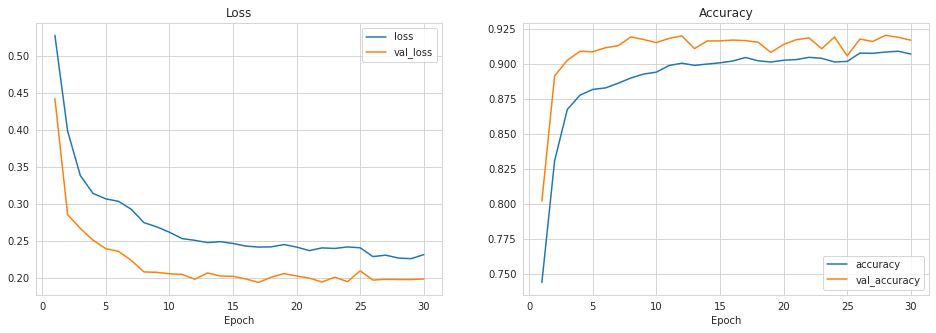

In [142]:
epoch=30

fig, ax = plt.subplots(ncols=2,figsize=(16,5))

ax[0].plot(range(1,epoch+1),history5.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history5.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')


ax[1].plot(range(1,epoch+1),history5.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history5.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

344/344 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.86      5079
         1.0       0.95      0.76      0.85      5915

    accuracy                           0.85     10994
   macro avg       0.86      0.86      0.85     10994
weighted avg       0.87      0.85      0.85     10994

344/344 [==============================] - 1s 2ms/step - loss: 0.1960 - accuracy: 0.9210
Test score: 0.19596831500530243
Test accuracy: 0.9209569096565247


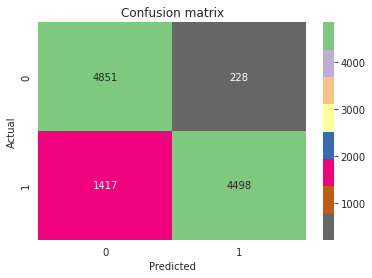

In [145]:
# Predicting the Test set results
y_pred4 = model5.predict(x_test)
y_pred4 = (y_pred2 > 0.5)

# classification_report
print(classification_report(y_test,y_pred4))

# Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="Accent_r" ,fmt='g')
plt.title('Confusion matrix', y=2.2)
plt.xlabel('Predicted')
plt.ylabel('Actual')

score4, acc4 = model5.evaluate(x_test, y_test, batch_size=32)
print('Test score:', score4)
print('Test accuracy:', acc4)

False    6268
True     4726
dtype: int64

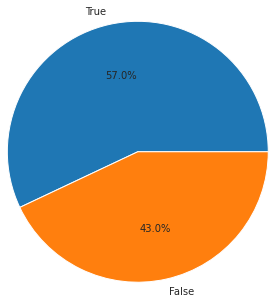

In [193]:
# Churn Prediction Distribution

pd.DataFrame(y_pred4).value_counts()
plt.figure(figsize=(3,3))
plt.pie(pd.DataFrame(y_pred4).value_counts(),labels=['True','False'],autopct='%0.1f%%',radius=2)
pd.DataFrame(y_pred4).value_counts()

```Statement :```  

A stable validation accuracy and good accuracy with a test score of 0.19 and a test accuracy of 0.92 in a deep learning model is a desirable outcome. It indicates that the model is performing well and generalizing to unseen data.

Validation accuracy is a metric that measures the performance of the model on a validation set, which is a portion of the data set that is set aside for testing the model during training. If the validation accuracy is stable, it means that the model is not overfitting to the training data and is generalizing well to unseen data.

The test score of 0.19 and the test accuracy of 0.92 indicate that the model is performing well on the test set, which is a portion of the data set that is set aside for evaluating the final performance of the model. A test accuracy of 0.92 suggests that the model is making correct predictions on 92% of the test data.

Overall, a stable validation accuracy and good accuracy with a test score of 0.19 and a test accuracy of 0.92 is a strong indication that the model is performing well and is suitable for deployment.

______
# VIII. Final Conclusion

The two deep learning models present different results based on their type and test scores.

Model 1 which is a sequential type model, has a test score of 0.25 and a test accuracy of 0.89. This indicates that the model is making predictions that are reasonably accurate, but there is still room for improvement.

Model 4 which is a functional type model, has a test score of 0.19 and a test accuracy of 0.92. This indicates that the model is making highly accurate predictions, with a much lower test score than the first model.

Overall, based on the test scores and accuracy, the functional type model appears to be performing better than the sequential type model. However, it's important to consider the specific problem and data set, as these results may not always be applicable to other scenarios. In addition, other factors, such as computational resources and the complexity of the model, should also be considered when choosing between these two types of models.

_____
# IX. Model Inference

Model inference is the process of using a trained machine learning model to make predictions on new data or case. The goal of model inference is to use the knowledge acquired by the model during training to make accurate predictions about the target variable(s) of interest.

Inference can be performed on a variety of data sources, such as images, text, or numerical data. The trained model takes in the input data and outputs predictions for the target variable(s), which can then be used for various purposes, such as classification, regression, or recommendation.

Model inference is a crucial step in the machine learning workflow, as it allows organizations to leverage their trained models to make predictions on new data and drive business decisions. By performing inference on a continuous basis, organizations can stay up-to-date with the latest trends and insights, allowing them to adapt and respond to changing conditions in real-time.

In [167]:
# generate random data
rng = np.random.default_rng(seed=np.random.randint(np.random.randint(1,100),np.random.randint(100,1000)))

region_category = rng.choice(df['region_category'].unique().tolist(), size=300)
membership_category = rng.choice(df['membership_category'].unique().tolist(), size=300)
joined_through_referral = rng.choice(df['joined_through_referral'].unique().tolist(), size=300)
preferred_offer_types = rng.choice(df['preferred_offer_types'].unique().tolist(), size=300)
medium_of_operation = rng.choice(df['preferred_offer_types'].unique().tolist(), size=300)
internet_option = rng.choice(df['internet_option'].unique().tolist(), size=300)
avg_time_spent = rng.uniform(df['avg_time_spent'].min(), df['avg_time_spent'].max(), size=300).round(2)
avg_transaction_value = rng.uniform(df['avg_transaction_value'].min(), df['avg_transaction_value'].max(), size=300).round(2)
avg_frequency_login_days = rng.uniform(df['avg_frequency_login_days'].min(), df['avg_frequency_login_days'].max(), size=300).round()
points_in_wallet = rng.uniform(df['points_in_wallet'].min(), df['points_in_wallet'].max(), size=300).round(2)
used_special_discount = rng.choice(df['used_special_discount'].unique().tolist(), size=300)
offer_application_preference = rng.choice(df['offer_application_preference'].unique().tolist(), size=300)
past_complaint = rng.choice(df['past_complaint'].unique().tolist(), size=300)
complaint_status = rng.choice(df['complaint_status'].unique().tolist(), size=300)
feedback = rng.choice(df['feedback'].unique().tolist(), size=300)
churn_risk_score = rng.choice(df['churn_risk_score'].unique().tolist(), size=300)


df_inf = pd.DataFrame({
    'region_category' : region_category,
    'membership_category' : membership_category,
    'joined_through_referral' : joined_through_referral,
    'preferred_offer_types' : preferred_offer_types,
    'medium_of_operation' : medium_of_operation,
    'internet_option' : internet_option,
    'avg_time_spent' : avg_time_spent,
    'avg_transaction_value' : avg_transaction_value,
    'avg_frequency_login_days' : avg_frequency_login_days,
    'points_in_wallet' : points_in_wallet,
    'used_special_discount' : used_special_discount,
    'offer_application_preference' : offer_application_preference,
    'past_complaint' : past_complaint,
    'complaint_status' : complaint_status,
    'feedback' : feedback,
    'churn_risk_score' : churn_risk_score})

In [168]:
df_inf.head()

,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,Village,Platinum Membership,No,Credit/Debit Card Offers,Credit/Debit Card Offers,Wi-Fi,124.40,63557.17,36.0,1932.37,No,No,No,Solved in Follow-up,User Friendly Website,0
1,Village,Silver Membership,Yes,Credit/Debit Card Offers,Without Offers,Mobile_Data,635.20,30402.83,50.0,499.19,No,Yes,Yes,Solved,Poor Website,1
2,Village,Premium Membership,Yes,Gift Vouchers/Coupons,Without Offers,Fiber_Optic,1544.34,69727.67,53.0,823.79,No,Yes,Yes,No Information Available,Quality Customer Care,1
3,Village,Silver Membership,No,Without Offers,Gift Vouchers/Coupons,Wi-Fi,216.65,33500.64,18.0,1941.21,No,No,Yes,No Information Available,Quality Customer Care,1
4,City,Gold Membership,Yes,Credit/Debit Card Offers,Without Offers,Mobile_Data,2895.90,80535.39,65.0,2041.86,Yes,No,Yes,Solved in Follow-up,No reason specified,1


In [169]:
df_inf.tail()

,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
295,Village,Premium Membership,Yes,Without Offers,Without Offers,Fiber_Optic,246.15,26476.99,7.0,880.70,Yes,No,No,Not Applicable,Products always in Stock,1
296,Town,Silver Membership,Yes,Gift Vouchers/Coupons,Credit/Debit Card Offers,Wi-Fi,1212.44,79910.59,15.0,200.23,No,Yes,No,Not Applicable,Poor Website,0
297,City,Platinum Membership,No,Without Offers,Gift Vouchers/Coupons,Fiber_Optic,1992.17,75245.69,29.0,1242.96,No,Yes,No,Unsolved,Reasonable Price,1
298,Town,Silver Membership,No,Gift Vouchers/Coupons,Without Offers,Mobile_Data,430.34,3233.66,30.0,1986.95,No,Yes,No,No Information Available,Too many ads,1
299,Town,Basic Membership,Yes,Without Offers,Credit/Debit Card Offers,Wi-Fi,596.96,56071.62,42.0,341.82,No,No,No,No Information Available,Poor Product Quality,0


In [170]:
# save data inference to csv
df_inf.to_csv('xdata_inference_p2ms1.csv', encoding='utf-8')

In [195]:
# Save model

model1.save('model1_ann_sequential.h5')
model4.save('model4_ann_functional.h5')